# energy deposition in scintillators as a function of the source y-displacement
to mimic what happens if we position the two detectors not on the same line with the source 
Dec-16, 2020

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'

In [18]:
filepath = '/Users/erezcohen/Desktop/data/PETsys/Geant4Simulations/EvaluationKit/RealSizeScintillators/'
filename,events_data = dict(),dict()
source_y_arr = np.array([0,1,2,4])
dz = 1 # source - scintillator distance
for source_y in source_y_arr:
    events_data[source_y] = pd.read_csv(filepath + 'ScintSourceDistance%dmm_SourceY%dmm_events.csv'%(dz,source_y));
print 'done loading data'

done loading data


In [19]:
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Geant4Simulations/EvaluationKit/'

## events

saved /Users/erezcohen/Desktop/PETsys/write-ups/Geant4Simulations/EvaluationKit/p1_G4sim_22Na_dz1mm_EdepCorrelation_source_y_varying.pdf


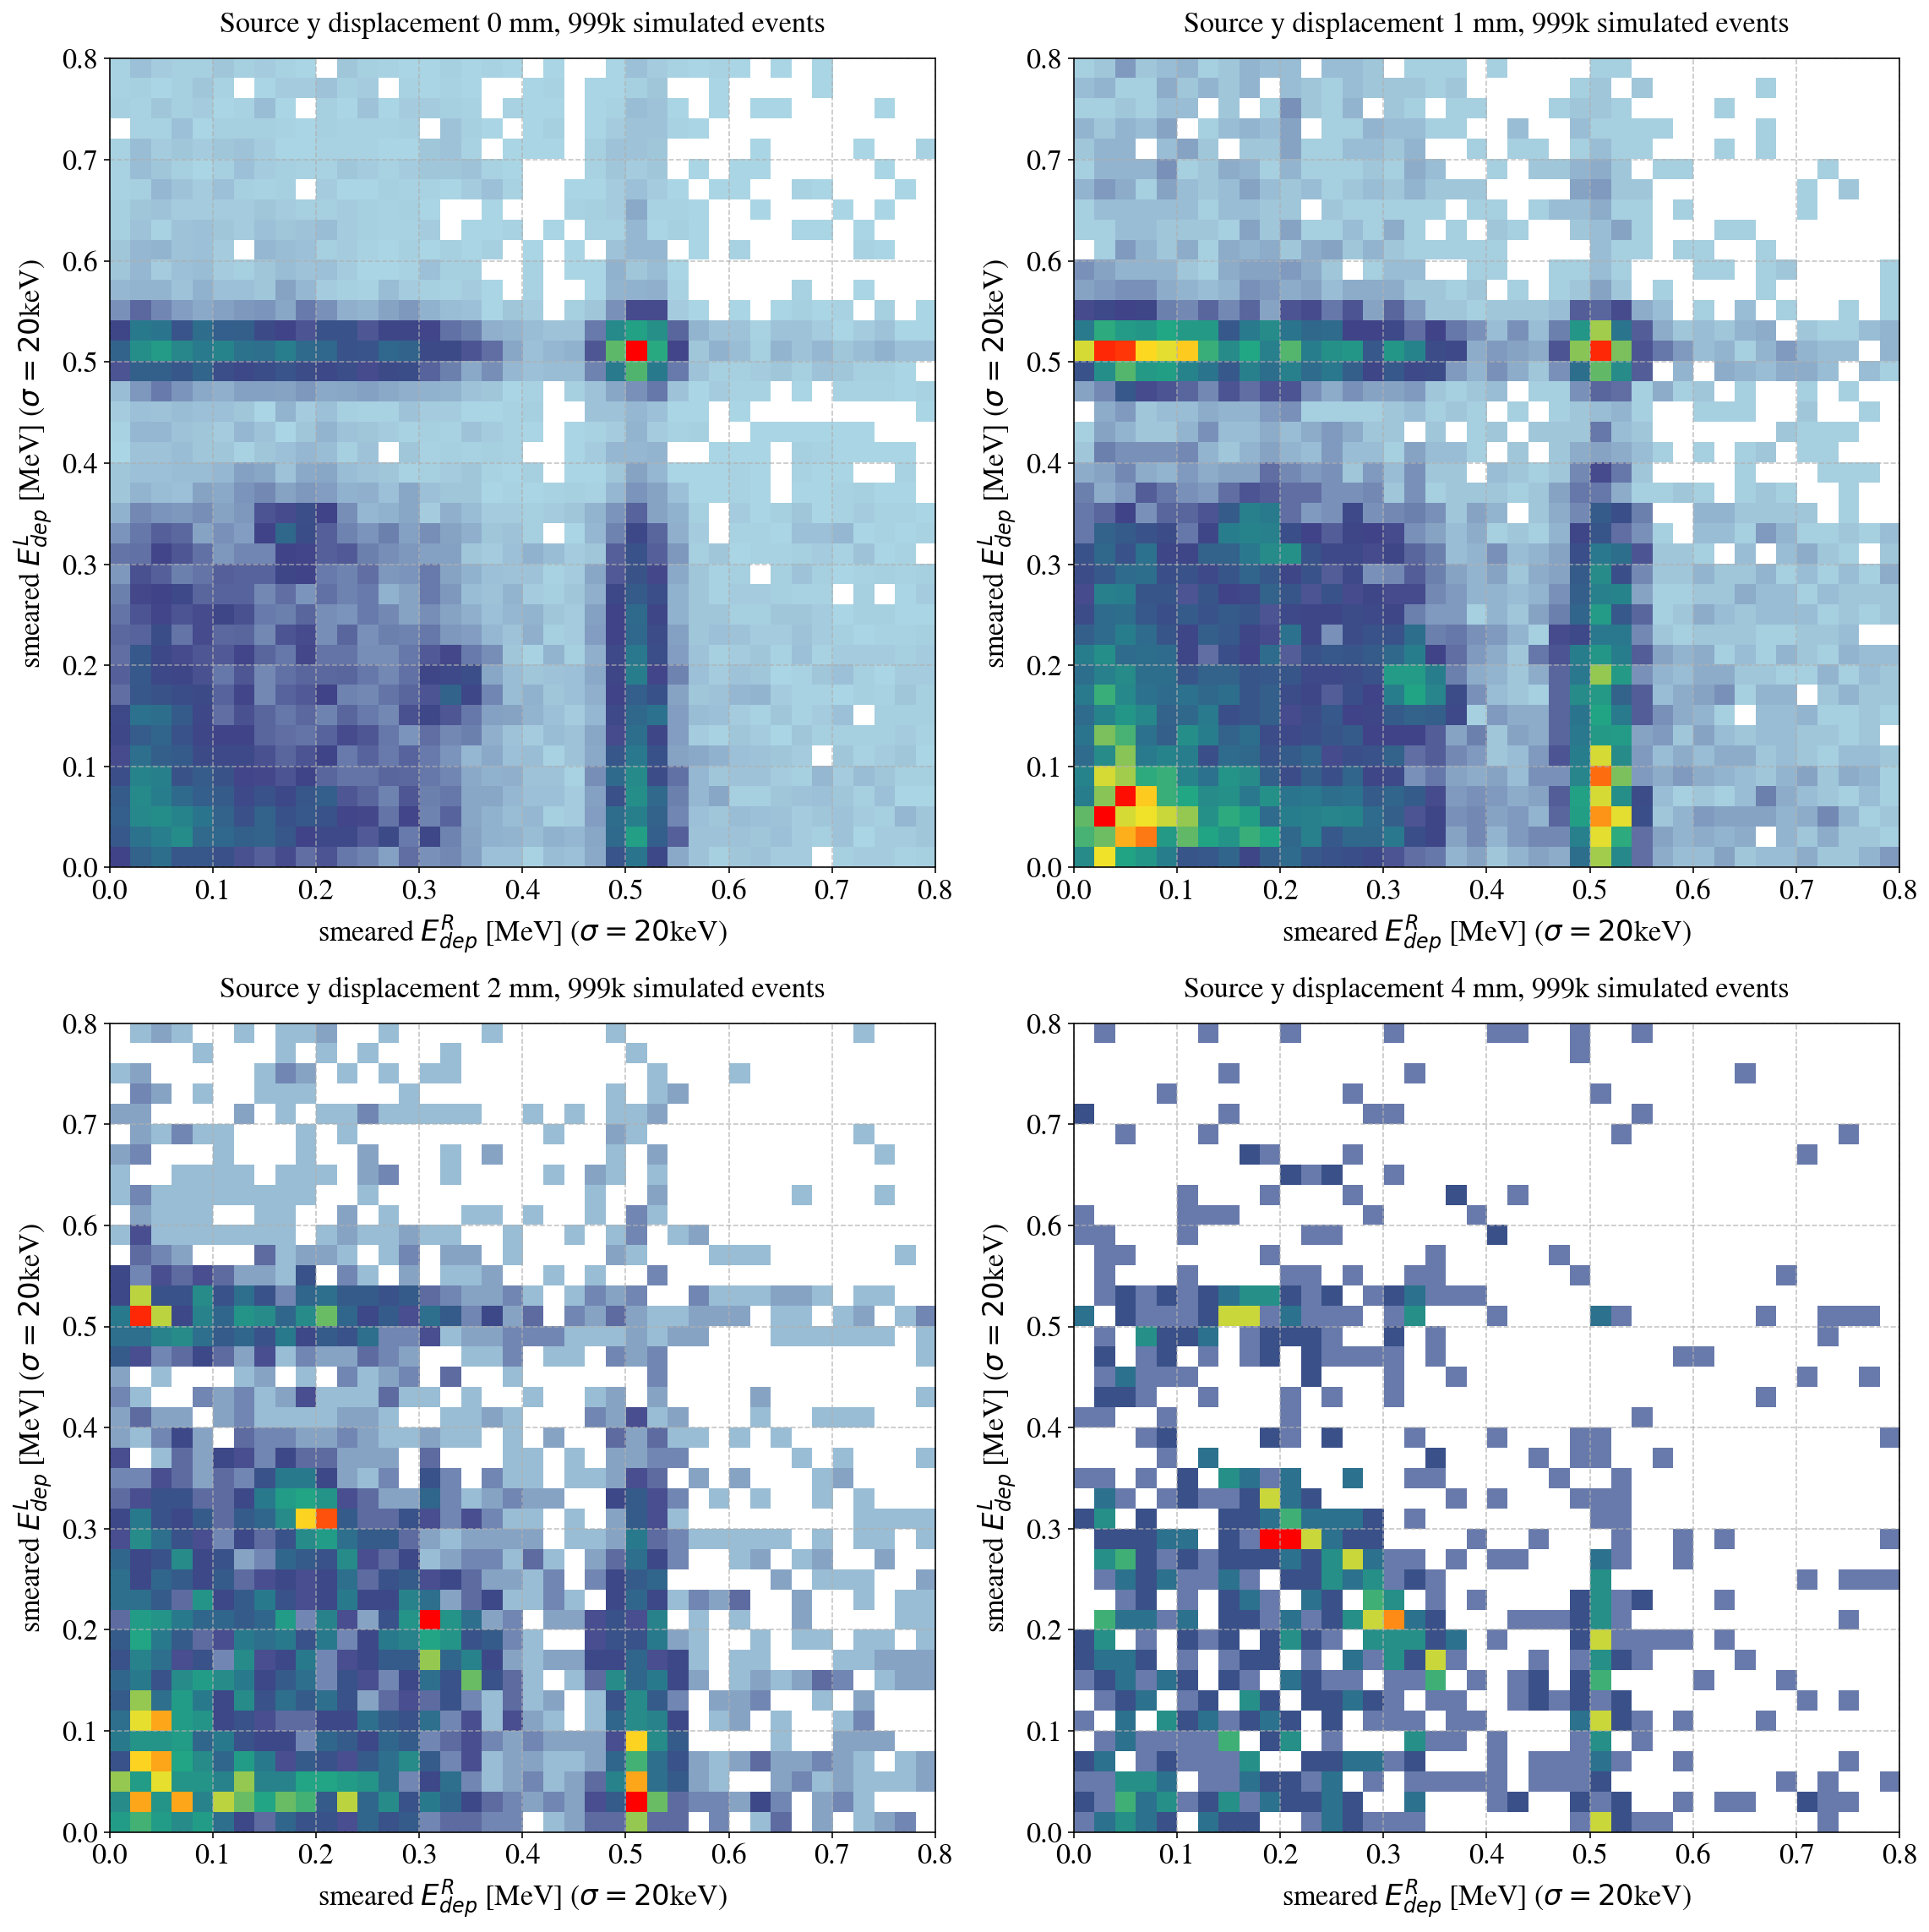

In [21]:
doHist2D = False; # else KDE scatter plot
doKDEscatter = !doHist2D;
doSmearEdep = True
EdepSigma = 0.02 # MeV
# EdepSigma = 0.0 # MeV

fig = plt.figure(figsize=(16,16));
for source_y,i in zip(source_y_arr,[1,2,3,4]):
    events = events_data[source_y]
    Nevents = np.max(events.eventId)
    label = 'Source y displacement %d mm, %dk simulated events'%(source_y,Nevents/1e3)
        
    events = events[(events['EdepTot(scint-1)/MeV']>0.01)&(events['EdepTot(scint-2)/MeV']>0.01)]
    Edep1 = np.array(events['EdepTot(scint-1)/MeV'])
    Edep2 = np.array(events['EdepTot(scint-2)/MeV'])
    SmearedEdep1 = np.random.normal(loc=Edep1,scale=EdepSigma)
    SmearedEdep2 = np.random.normal(loc=Edep2,scale=EdepSigma)
    x_label = '$E_{dep}^{R}$ [MeV]'
    y_label = '$E_{dep}^{L}$ [MeV]'
    if doSmearEdep:
        x,y = SmearedEdep1,SmearedEdep2
        x_label = 'smeared ' + x_label + ' ($\sigma=%.0f$keV)'%(EdepSigma*1000)
        y_label = 'smeared ' + y_label + ' ($\sigma=%.0f$keV)'%(EdepSigma*1000)
    else:
        x,y = Edep1,Edep2    
    if doHist2D:
        ax=fig.add_subplot(2,2,i)
        ax.hist2d(x,y,cmap=white_viridis, bins=(np.linspace(0.,0.8,45),np.linspace(0.,0.8,45)));
    else:
        ax=fig.add_subplot(2,2,i,projection='scatter_density')    
        ax.scatter_density(x,y,cmap=white_viridis, dpi=6, downres_factor=2)    
    set_axes(ax=ax,x_label=x_label,xlim=(0.,0.8),y_label=y_label,ylim=(0.,0.8),title=label,fontsize=17,do_add_grid=True);         
plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_G4sim_22Na_dz1mm_EdepCorrelation_source_y_varying.pdf')